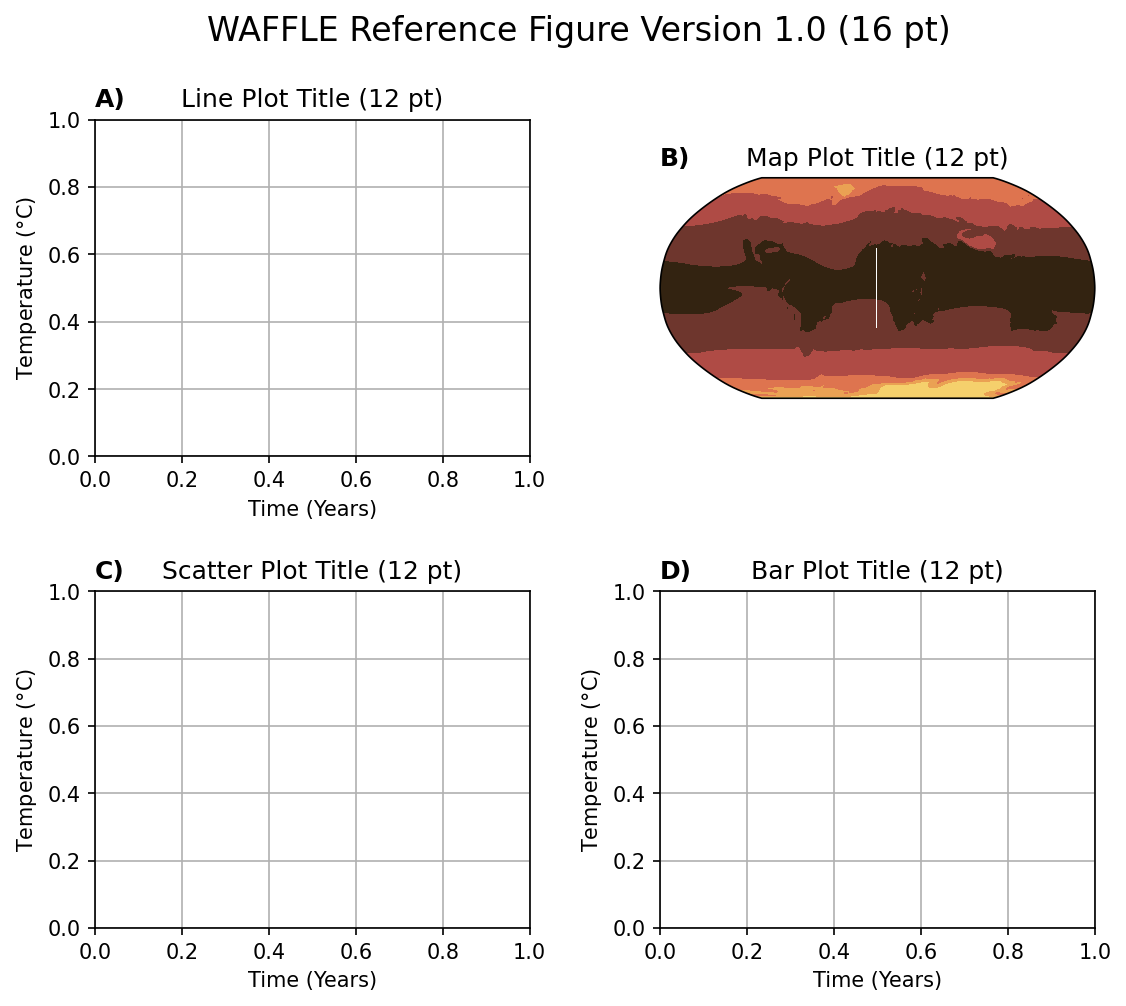

In [138]:
import matplotlib.font_manager
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.transforms import ScaledTranslation
import xarray
import matplotlib.colors as mcolors
import numpy as np

#### PATHS
PATH_CMAP_TEMPSEQ = "../ipcc_colormaps/continuous_colormaps_rgb_0-1/temp_seq.txt"
PATH_MPLSTYLE_PACL = 'pacl.mplstyle'
PATH_SAMPLE_SPATIAL = "sample_spatial_ds.nc"
PATH_SAMPLE_TS = "sample_timeseries_ds.nc"

#### CONFIGS
SAMPLE_VAR = "tasmax"

#### Initialization
plt.style.use(PATH_MPLSTYLE_PACL)
cmap_temp_seq = mcolors.LinearSegmentedColormap.from_list('colormap', np.loadtxt(PATH_CMAP_TEMPSEQ))

#### Plotting functions
def addSubPlotLabels(f):
    for index, ax in enumerate(f.axes):
        label = chr(ord('@') + (index + 1 % 26))
        # ax.text(0, 1, label, transform=(
        #     ax.transAxes + ScaledTranslation(0, 0, f.dpi_scale_trans)
        # ),
        #         bbox=dict(facecolor='0.7', edgecolor='none', pad=1.0))
        ax.set_title(f"{label})", loc="left", fontweight="bold")

#### End of functions

sample_spatial_ds = xarray.open_dataset(PATH_SAMPLE_SPATIAL)[SAMPLE_VAR]
sample_ts_ds = xarray.open_dataset(PATH_SAMPLE_TS)[SAMPLE_VAR]


f = plt.figure()
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222, projection=ccrs.Robinson())

ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax1.set_title("Line Plot Title (12 pt)")
ax2.set_title("Map Plot Title (12 pt)")

ax3.set_title("Scatter Plot Title (12 pt)")
ax4.set_title("Bar Plot Title (12 pt)")

f.suptitle("WAFFLE Reference Figure Version 1.0 (16 pt)")

ax1.set_xlabel("Time (Years)")
ax3.set_xlabel("Time (Years)")
ax4.set_xlabel("Time (Years)")


ax1.set_ylabel("Temperature ($\\degree$C)")
ax3.set_ylabel("Temperature ($\\degree$C)")
ax4.set_ylabel("Temperature ($\\degree$C)")

addSubPlotLabels(f)


ax2.contourf(sample_spatial_ds.lon.values,
             sample_spatial_ds.lat.values,
             sample_spatial_ds.values,
             transform=ccrs.PlateCarree(), cmap=cmap_temp_seq)

# Add mean +- std in text box
# Add PACL copyright
f.show()